# Read in and explore the COVID-19 clusters dataframes

The Metro Public Health Department tracks COVID-19 clusters. The files `clusters.csv` and `clusters_by_type.csv` contain the tables of clusters as reported by WSMV along with the coordinates of the clusters. Can you find any connection between the reported COVID violations and subsequent COVID clusters?

In [1]:
import pandas as pd

In [2]:
clusters = pd.read_csv('../data/clusters.csv')
clusters.head()

,Cluster Name,Facility Type,Cluster Start Date,# Cases,Latitude,Longitude
0,Vanderbilt Parties,Social Gathering,3/11/2020,49,36.125891,-86.822863
1,Event at Clementine Hall,Social Gathering,3/14/2020,23,36.152444,-86.8467716
2,Religious Retreat,Social Gathering,3/25/2020,18,NaN,NaN
3,The Health Center at Richland Place,LTCF,4/3/2020,47,36.128750,-86.8195333
4,Trevecca Center for Rehab and Healing,LTCF,4/4/2020,102,36.144562,-86.7567485


In [3]:
clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cluster Name        62 non-null     object 
 1   Facility Type       62 non-null     object 
 2   Cluster Start Date  62 non-null     object 
 3   # Cases             62 non-null     int64  
 4   Latitude            52 non-null     float64
 5   Longitude           52 non-null     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 3.0+ KB


In [4]:
clusters.columns = ['cluster_name', 'type', 'start_date', 'no_cases', 'lat', 'long']
clusters.head()

,cluster_name,type,start_date,no_cases,lat,long
0,Vanderbilt Parties,Social Gathering,3/11/2020,49,36.125891,-86.822863
1,Event at Clementine Hall,Social Gathering,3/14/2020,23,36.152444,-86.8467716
2,Religious Retreat,Social Gathering,3/25/2020,18,NaN,NaN
3,The Health Center at Richland Place,LTCF,4/3/2020,47,36.128750,-86.8195333
4,Trevecca Center for Rehab and Healing,LTCF,4/4/2020,102,36.144562,-86.7567485


In [6]:
# Clean up data types in the clusters dataframe
clusters.start_date = pd.to_datetime(clusters['start_date'], errors = 'raise')
clusters.long = clusters.long.str.replace(',','')
clusters.long = pd.to_numeric(clusters['long'], errors = 'raise')
clusters.long.unique()

In [9]:
# Check that the datatypes look good
clusters.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   cluster_name  62 non-null     object        
 1   type          62 non-null     object        
 2   start_date    62 non-null     datetime64[ns]
 3   no_cases      62 non-null     int64         
 4   lat           52 non-null     float64       
 5   long          52 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 3.0+ KB


### Read in the Clusters by Type dataframe

In [10]:
clusters_by_type = pd.read_csv('../data/clusters_by_type.csv')
clusters_by_type.head()

,Cluster Type,Number of Clusters
0,Bar,7
1,Church,2
2,College / University,5
3,Commercial-Warehouse,12
4,Congregate Living,13


In [11]:
clusters_by_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Cluster Type        18 non-null     object
 1   Number of Clusters  18 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


In [12]:
# Update the column names
clusters_by_type.columns = ['type', 'cluster_count']
clusters_by_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   type           18 non-null     object
 1   cluster_count  18 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 416.0+ bytes


In [16]:
# Compare the cluster types in the two dataframes
print(clusters.sort_values('type').type.unique())
print(clusters_by_type.sort_values('type').type.unique())

['Bar' 'Church' 'College / University' 'Commercial-Warehouse'
 'Congregate Living' 'Construction' 'Correctional Facility' 'Gym' 'LTCF'
 'Office' 'Other' 'Restaurant' 'School' 'Social Gathering']
['Bar' 'Church' 'College / University' 'Commercial-Warehouse'
 'Congregate Living' 'Construction' 'Correctional Facility' 'Day Care'
 'Food Production' 'Grocery' 'Gym' 'Healthcare, non-LTCF' 'LTCF' 'Office'
 'Other' 'Restaurant' 'School' 'Social Gathering']


The list looks largely the same, though there are some cluster types that are not represented in the individual `clusters` dataset. Based on my understanding of COVID-19 data aggregation practices, that might be to protect the privacy of individuals diagnosed with COVID-19 in small clusters.

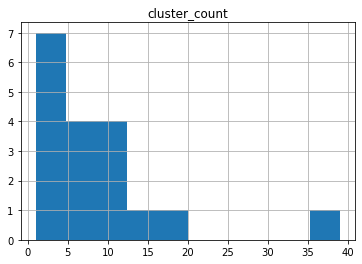

In [18]:
clusters_by_type.hist();